In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [139]:
df=pd.read_csv('Ajio.csv')

In [140]:
df

,Product_URL,Brand,Description,Id_Product,URL_image,Category_by_gender,Discount Price (in Rs.),Original Price (in Rs.),Color
0,https://www.ajio.com/netplay-checked-polo-t-sh...,netplay,Checked Polo T-shirt,4.410000e+11,https://assets.ajio.com/medias/sys_master/root...,Men,559,699,white
1,https://www.ajio.com/netplay-tapered-fit-flat-...,netplay,Tapered Fit Flat-Front Trousers,4.410000e+11,https://assets.ajio.com/medias/sys_master/root...,Men,720,"1,499",navy
2,https://www.ajio.com/the-indian-garage-co-stri...,the-indian-garage-co,Striped Slim Fit Shirt with Patch Pocket,4.600000e+11,https://assets.ajio.com/medias/sys_master/root...,Men,495,"1,649",white
3,https://www.ajio.com/performax-heathered-crew-...,performax,Heathered Crew-Neck T-shirt,4.410000e+11,https://assets.ajio.com/medias/sys_master/root...,Men,329,599,charcoal
4,https://www.ajio.com/john-players-jeans-washed...,john-players-jeans,Washed Skinny Fit Jeans with Whiskers,4.410000e+11,https://assets.ajio.com/medias/sys_master/root...,Men,899,999,jetblack
...,...,...,...,...,...,...,...,...,...
2014,https://www.ajio.com/satrani-poly-silk-printed...,satrani,Poly Silk Printed Saree with Blouse Piece,4.615830e+11,https://assets.ajio.com/medias/sys_master/root...,Women,441,999,navy
2015,https://www.ajio.com/american-eagle-outfitters...,american-eagle-outfitters,Floral Print Button-Down Peplum Loose Top with...,4.691140e+11,https://assets.ajio.com/medias/sys_master/root...,Women,"1,799","2,999",cream
2016,https://www.ajio.com/indie-picks-handblock-pri...,indie-picks,Handblock Print Kalamkari Cotton Dupatta,4.690400e+11,https://assets.ajio.com/medias/sys_master/root...,Women,360,899,multi
2017,https://www.ajio.com/jdy-by-only-sleeveless-cr...,jdy-by-only,Sleeveless Crew-Neck T-shirt,4.413090e+11,https://assets.ajio.com/medias/sys_master/root...,Women,569,949,purple


In [141]:
df.describe()

,Id_Product
count,2.019000e+03
mean,4.528714e+11
std,1.309390e+10
min,4.100000e+11
25%,4.410000e+11
50%,4.609210e+11
75%,4.631600e+11
max,4.691950e+11


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_URL              2019 non-null   object 
 1   Brand                    2019 non-null   object 
 2   Description              2019 non-null   object 
 3   Id_Product               2019 non-null   float64
 4   URL_image                2019 non-null   object 
 5   Category_by_gender       2019 non-null   object 
 6   Discount Price (in Rs.)  2019 non-null   object 
 7   Original Price (in Rs.)  2019 non-null   object 
 8   Color                    2019 non-null   object 
dtypes: float64(1), object(8)
memory usage: 142.1+ KB


In [143]:
df['Discount Price (in Rs.)'] = df['Discount Price (in Rs.)'].str.strip(',')
df['Discount Price (in Rs.)'] = pd.to_numeric(df['Discount Price (in Rs.)'],errors='coerce')

In [144]:
df['gender']=df['Category_by_gender'].apply(change)

In [145]:
def change(x):
    if x=='Men':
        return "Male"
    else:
        return "Female"

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_URL              2019 non-null   object 
 1   Brand                    2019 non-null   object 
 2   Description              2019 non-null   object 
 3   Id_Product               2019 non-null   float64
 4   URL_image                2019 non-null   object 
 5   Category_by_gender       2019 non-null   object 
 6   Discount Price (in Rs.)  1439 non-null   float64
 7   Original Price (in Rs.)  2019 non-null   object 
 8   Color                    2019 non-null   object 
 9   gender                   2019 non-null   object 
dtypes: float64(2), object(8)
memory usage: 157.9+ KB


NULL HYPOTHESIS: 
In the population, the distribution of amount spent for men's products in ajio is same as women's products.
 

ALTERNATIVE HYPOTHESIS:
In the population, the distribution of amount spent for men's products in ajio is lesser than women's products.

In [147]:
price=df[['Discount Price (in Rs.)','gender']]

In [148]:
men=price[price['gender']=='Male']
men

,Discount Price (in Rs.),gender
0,559.0,Male
1,720.0,Male
2,495.0,Male
3,329.0,Male
4,899.0,Male
...,...,...
1004,689.0,Male
1005,319.0,Male
1006,483.0,Male
1007,588.0,Male


In [149]:
wmen=price['Discount Price (in Rs.)'] [price['gender']=='Female']
wmen

1009    599.0
1010      NaN
1011      NaN
1012    392.0
1013    800.0
        ...  
2014    441.0
2015      NaN
2016    360.0
2017    569.0
2018    593.0
Name: Discount Price (in Rs.), Length: 1010, dtype: float64

array([<AxesSubplot: title={'center': 'Female'}>,
       <AxesSubplot: title={'center': 'Male'}>], dtype=object)

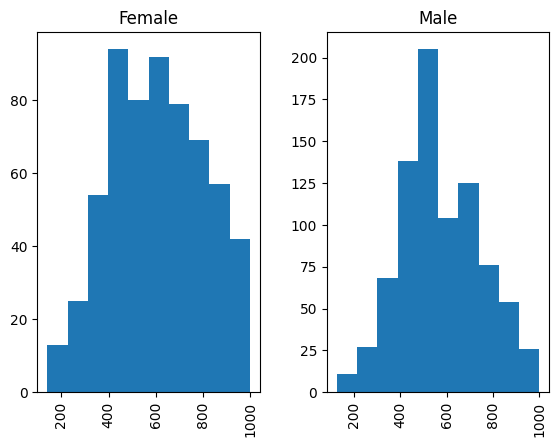

In [150]:
price.hist(by='gender')

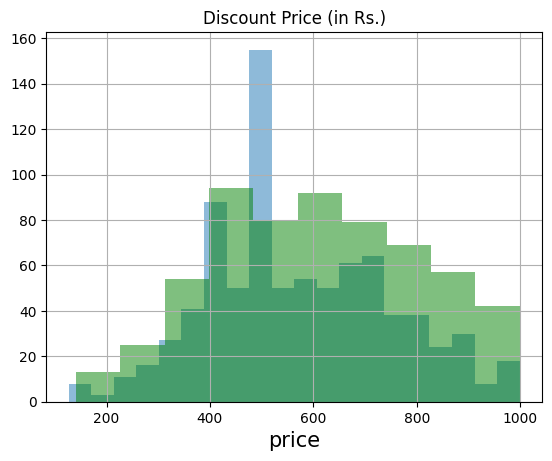

In [151]:
import seaborn as sns
men.hist(histtype='stepfilled', alpha=.5, bins=20)
wmen.hist(histtype='stepfilled', alpha=.5,color='green', bins=10)
plt.xlabel('price',fontsize=15)
plt.show()

The distribution of females is sligghtly shifted right of the distribution of males

In [152]:
means_table = price.groupby('gender').mean()
means_table

,Discount Price (in Rs.)
gender,
Female,608.357025
Male,574.664269


In [161]:
observed_difference = means_table['Discount Price (in Rs.)'][0] - means_table['Discount Price (in Rs.)'][1]
observed_difference

33.69275620825647

In [167]:
shuffled = price.sample(2019,replace = False)
shuffled_price = shuffled['Discount Price (in Rs.)']
original_and_shuffled = price.assign(shuffled_price=shuffled_price.values )
all_group_means= original_and_shuffled.groupby('gender').mean()
difference = all_group_means['shuffled_price'][0]- all_group_means['shuffled_price'][1]
difference

13.547875977977355

In [169]:
import numpy as np
import array
differences = np.zeros(1000)

In [175]:
for i in np.arange(1000):
    shuffled = price.sample(2019,replace = False)
    shuffled_price = shuffled['Discount Price (in Rs.)']
    original_and_shuffled = price.assign(shuffled_price=shuffled_price.values )
    all_group_means= original_and_shuffled.groupby('gender').mean()
    difference = all_group_means['shuffled_price']['Female']- all_group_means['shuffled_price']['Male']
    differences[i]=difference

In [176]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-1.887526
1,-14.613762
2,-12.577302
3,-21.214491
4,11.806622
...,...
995,4.787358
996,0.385189
997,12.173913
998,-1.591653


Observed Difference: 33.69275620825647


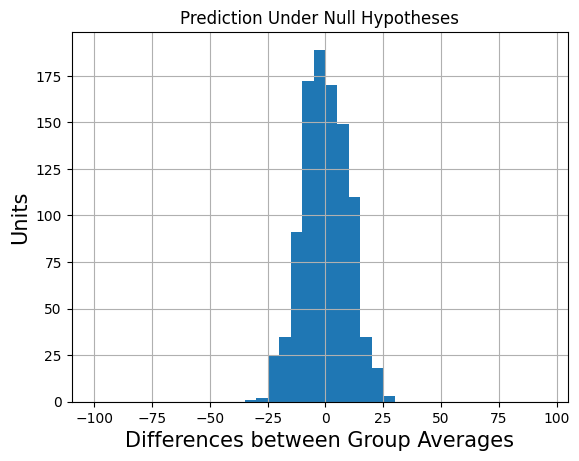

In [182]:
differences_df.hist(bins = np.arange(-100,100,5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [178]:
np.count_nonzero(differences <= observed_difference)/differences.size

1.0

Therefore we can say that the distribution of amount spent for men's products in ajio is lesser than women's products.
i.e.,we accept alternate hypothesis.